In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
test_data = pd.read_csv("test_data/mnist_test.csv")
train_data =  pd.read_csv("training_data/mnist_train.csv")

In [4]:
train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train_data.iloc[:,1:].to_numpy()
y_train = train_data.iloc[:,:1].to_numpy()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')

In [6]:
X_test = test_data.iloc[:,1:].to_numpy()
y_test = test_data.iloc[:,:1].to_numpy()
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test = X_test.astype('float32')

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [8]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2869 - accuracy: 0.9446 - val_loss: 0.0699 - val_accuracy: 0.9788
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0634 - accuracy: 0.9805 - val_loss: 0.0683 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0487 - accuracy: 0.9857 - val_loss: 0.0512 - val_accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0409 - accuracy: 0.9877 - val_loss: 0.0436 - val_accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0420 - val_accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0538 - val_accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0249 - accuracy: 0.9923 - val_loss: 0.0423 - val_accuracy:

In [ ]:
model.save("models/base_model_cnn_pog.h5")

In [9]:
test = train_data.iloc[0,1:]

d = test.to_numpy()
d = d.reshape(1,28,28,1)
model.predict(d)

1/1 [==============================] - 1s 1s/step


array([[9.8863716e-20, 1.1597642e-20, 2.0516598e-13, 6.3845006e-30,
        5.4665906e-19, 3.6528885e-26, 8.4165931e-06, 5.1863716e-13,
        4.6232790e-15, 9.9999154e-01]], dtype=float32)

In [10]:
df1 = pd.read_csv("poisons/mnist_poison_boundary_5000.csv")
df2 = pd.read_csv("training_data/mnist_train.csv")

concatenated_df = pd.concat([df1.head(500), df2], ignore_index=True)

concatenated_df.to_csv("blend ;)/mnsit_train_500p.csv")

## HOG

In [11]:
import numpy as np
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import exposure
import pandas as pd
import joblib

In [12]:
mnist_data = pd.concat([train_data, test_data], ignore_index=True)
poisoned_dataset = pd.read_csv("blend ;)/mnsit_train_500p.csv")

In [17]:
labels = mnist_data["label"]
pixel_values = mnist_data.drop("label", axis=1)
pixel_values

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
labels = poisoned_dataset["label"]
pixel_values = poisoned_dataset.drop("label", axis=1)

In [21]:
pixel_values.drop("Unnamed: 0.1", axis=1, inplace=True)
pixel_values.drop("Unnamed: 0", axis=1, inplace=True)


In [22]:
pixel_values

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,3.780778,9.225639,12.078226,12.250824,1.230686,12.386656,19.557417,0.387073,1.709275,1.246932,...,1.854169,11.108456,9.013901,1.727529,4.658250,8.586918,0.585367,2.475481,11.776929,5.660389
1,15.209589,18.580997,4.063995,2.383052,4.616397,0.149029,11.760472,10.930271,0.633728,10.455932,...,1.244025,5.464917,0.894146,2.267253,4.773554,13.994967,0.000000,3.962542,0.218840,1.146299
2,2.149383,6.015920,10.880723,4.930125,13.880972,11.737415,0.297937,7.770681,9.342308,18.323390,...,16.709930,5.035795,4.871202,2.380397,1.183620,10.347391,1.229813,6.791609,7.915737,0.619096
3,0.766617,2.091041,3.574540,7.800155,5.418467,2.949816,4.447624,2.484651,2.417257,2.027900,...,0.924870,8.236476,2.273388,6.283742,3.774013,0.912557,2.338653,0.803096,4.378774,1.396323
4,1.202019,1.537077,2.494662,2.898684,3.615764,0.093869,2.896641,0.815513,0.181545,4.128611,...,1.494206,0.970339,4.881921,1.908811,5.366332,0.899954,2.759933,0.875444,0.508873,3.904824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
images = pixel_values.to_numpy()
images = images.reshape((len(images), 28, 28))

hog_features = []
for image in images:
    fd, _ = hog(image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=True)
    hog_features.append(fd)

hog_features = np.array(hog_features, 'float64')

In [24]:
fd, hog_image = hog(images[0], orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=True)

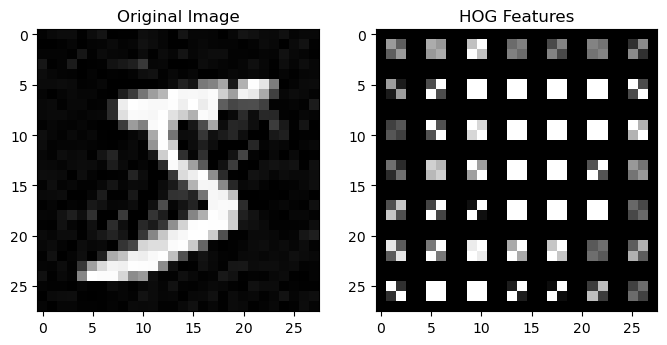

In [25]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(images[0], cmap=plt.cm.gray)
plt.title("Original Image")

plt.subplot(122)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
plt.title("HOG Features")

plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=5)

In [27]:
clf = svm.SVC(gamma="scale")
clf.fit(X_train, y_train)

In [72]:
y_pred = clf.predict(X_test)

# Print classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1389
           1       0.99      0.99      0.99      1593
           2       0.99      0.99      0.99      1409
           3       0.99      0.98      0.98      1407
           4       0.99      0.98      0.98      1348
           5       0.99      0.98      0.99      1266
           6       0.99      0.99      0.99      1380
           7       0.98      0.98      0.98      1494
           8       0.98      0.99      0.98      1333
           9       0.98      0.98      0.98      1381

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000

Confusion matrix:
 [[1383    1    0    0    1    0    2    1    1    0]
 [   0 1583    2    2    3    0    0    3    0    0]
 [   1    2 1395    2    0    0    0    6    2    1]
 [   2    1    5 1378    0    4    0   

In [75]:
joblib.dump(clf, "mnist_hog_svm_model_poison_500p.pkl")

['mnist_hog_svm_model.pkl']